In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data (samples = dati, features = variabili)
np.random.seed(42)
n_samples, n_features = 400, 150
X, y, true_coef = make_regression(n_samples=n_samples, n_features=n_features, n_informative=15, noise=0, coef=True)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit LASSO, Ridge, and LinearRegression models
regul = 2.0
lasso = Lasso(alpha=regul)
ridge = Ridge(alpha=regul)
linear = LinearRegression()
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
linear.fit(X_train, y_train)


LinearRegression()

**Significato di n_informative**

Immagina di voler creare un set di dati fittizio per prevedere il prezzo di un'auto (y).

Decidi di registrare 150 caratteristiche (n_features = 150), tra cui:
- metri_quadrati
- numero_di_stanze
- anno_costruzione
... (15 caratteristiche in totale che hanno senso)

- colore_della_porta_del_garage
- numero_di_alberi_nel_viale
- giorno_della_settimana_in_cui_è_stata_venduta
... (le restanti 135 caratteristiche irrilevanti)

Quando crei il set di dati con make_regression, il parametro n_informative = 15 dice al computer: "Ok, calcola il prezzo reale (y) usando solo quelle 15 features utili (es: prezzo = (100 * metri_quadrati) + (500 * n_stanze) + ...). Per le altre 135, il loro vero 'peso' (coefficiente) sul prezzo è zero."

Quindi, n_informative non è un risultato del modello, ma un parametro di costruzione dei dati. Stabilisce la "verità di fondo" che il modello di machine learning dovrà cercare di scoprire: ci sono solo 15 cose che contano davvero, e 135 che sono solo fuffa.
\

**Differenza tra n_informative e noise = 0**

L'errore comune è pensare che le 135 features irrilevanti siano il rumore. Non lo sono.

- n_informative = 15: Definisce il rumore strutturale (features inutili).
- noise = 0: Definisce il rumore di misurazione (imprecisioni nei valori y).

Torniamo all'esempio della casa:

- **Rumore Strutturale** (n_informative): Il prezzo y è calcolato solo con i 15 fattori utili. I 135 fattori irrilevanti (colore_della_porta) sono presenti nei dati X, ma il loro vero impatto sul prezzo y è nullo. Il compito del modello è capire che il coefficiente per "colore_della_porta" deve essere 0.

- **Rumore di Misurazione** (noise): Questo parametro aggiunge un'imprecisione casuale al risultato finale y.

  - Con **noise = 0** (come nel codice): Se la formula vera (basata sulle 15 features) dice che la casa vale 300.000€, nel nostro dataset il valore y sarà esattamente 300.000,00€. I dati sono perfetti, puliti, matematici.

  - Con **noise > 0**: Se la formula vera dice 300.000€, nel dataset il valore y potrebbe essere 301.250€, 299.800€, o 300.500€. C'è un'imprecisione casuale, come un errore di misurazione o un fattore sconosciuto (es: l'umore dell'acquirente).

Perché noise = 0 è fondamentale qui? Perché la Regressione Lineare Semplice (OLS) soffre di overfitting quando c'è rumore. Se ci fosse noise > 0, OLS cercherebbe disperatamente di spiegare quel rumore casuale usando anche le 135 features inutili, ottenendo un modello terribile. Mettendo noise = 0, abbiamo rimosso la debolezza principale di OLS. I dati sono una "equazione" perfetta, e OLS è lo strumento perfetto per risolvere un'equazione.

**Il parametro regul**

regul = 2.0 (chiamato alpha nei modelli) è il termostato della penalità. Controlla quanto i modelli LASSO e Ridge devono essere puniti per avere coefficienti grandi.

- regul = 0: Nessuna penalità. Il termostato è spento. LASSO e Ridge si comporterebbero esattamente come la Regressione Lineare Semplice.

- regul = 2.0 (come nel codice): Una penalità moderata. Il modello cerca di minimizzare l'errore, ma allo stesso tempo è costretto a mantenere i coefficienti "bassi". È un equilibrio.

- regul molto alto (es: 1000): Penalità altissima. Il modello si preoccuperà quasi solo di avere coefficienti piccoli (vicini a zero), ignorando i dati. Questo porta a underfitting (il modello è troppo semplice e non impara nulla).

È il parametro che "introduce" il bias (la distorsione) nel modello per combattere la varianza (l'overfitting).

Impostando regul (alpha) a zero, le equazioni di LASSO e Ridge diventano l'equazione della Regressione Lineare Standard.
Vediamo la matematica a livello concettuale. Ogni modello di regressione ha un "obiettivo": una funzione di costo da minimizzare. Il modello modifica i suoi coefficienti ($\beta$) finché non trova il valore più basso possibile per questa funzione.

- **Regressione Lineare Standard (OLS)**: L'obiettivo è solo minimizzare l'Errore Quadratico (SSE).
  - Costo(OLS) = $\sum (y_{vera} - y_{predetta})^2$

- **Regressione Ridge (L2)**: L'obiettivo è un equilibrio tra minimizzare l'errore e aggiungere una penalità per i coefficienti grandi.
  - Costo(Ridge) = $\sum (y_{vera} - y_{predetta})^2 + \alpha \sum (\beta_j^2)$
  - regul (o $\alpha$) è il moltiplicatore della penalità.

  Ora, guarda cosa succede matematicamente se impostiamo regul = 0:

  - Costo(Ridge) = $\sum (y_{vera} - y_{predetta})^2 + 0 \cdot \sum (\beta_j^2)$
  - Costo(Ridge) = $\sum (y_{vera} - y_{predetta})^2$
  - L'equazione è diventata identica a quella dell'OLS. Il modello non ha più nessuna penalità, quindi il suo unico obiettivo è minimizzare l'errore, proprio come l'OLS.

- **Regressione LASSO (L1)**: Stessa logica, ma la penalità è diversa (valore assoluto invece che quadrato).
  - Costo(LASSO) = $\sum (y_{vera} - y_{predetta})^2 + \alpha \sum |\beta_j|$
  
  Cosa succede se impostiamo regul = 0?
  - Costo(LASSO) = $\sum (y_{vera} - y_{predetta})^2 + 0 \cdot \sum |\beta_j|$
  - Costo(LASSO) = $\sum (y_{vera} - y_{predetta})^2$
  - Anche questa equazione è diventata identica a quella dell'OLS.
  
In sintesi: regul (alpha) è il "termostato" della regolarizzazione. Se lo imposti a 0, spegni la regolarizzazione, e sia LASSO che Ridge si comportano esattamente come una Regressione Lineare standard.

In [11]:
# Evaluate performance
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
linear_pred = linear.predict(X_test)

# Evaluate performance (evaluating MSE)
lasso_mse = mean_squared_error(y_test, lasso.predict(X_test))
ridge_mse = mean_squared_error(y_test, ridge.predict(X_test))
linear_mse = mean_squared_error(y_test, linear.predict(X_test))

**Cosa fa .predict(X_test)**

Questo blocco esegue la fase di "esame" per i modelli.

- .fit(X_train, y_train) (fatto prima): È la fase di addestramento. I modelli analizzano i dati X_train e y_train per imparare la relazione tra loro. Il risultato è un set di coefficienti (i "pesi").

  - Esempio: linear impara y = 10*feat1 - 5*feat2 + ...

  - Esempio: lasso impara y = 8*feat1 + 0*feat2 + ...

- .predict(X_test): È la fase di previsione.

  - I modelli prendono i dati di test (X_test), che non hanno mai visto prima.

  - Usano i coefficienti che hanno imparato nella fase fit per calcolare un valore y previsto (y_pred) per ogni riga di X_test.

  - Esempio: linear_pred = linear.predict(X_test) chiede a OLS: "Usa la tua formula per indovinare i risultati di questi nuovi dati".

L'output (lasso_pred, ridge_pred, linear_pred) è semplicemente un elenco di numeri (le previsioni). Questi numeri vengono poi confrontati con y_test (i risultati veri) per calcolare l'errore (MSE).

**Perchè alcuni coefficienti sono nulli?**

Questo è l'effetto magico di LASSO (L1) e la sua differenza fondamentale con Ridge (L2).

- Ridge (L2): Usa una penalità quadratica ($L_2 = \alpha \sum \beta^2$). Per il modello, è sempre "conveniente" tenere tutti i coefficienti molto piccoli, piuttosto che azzerarne alcuni. È come se preferisse dare un pizzico di importanza a tutte le 150 features. Restringe, ma non azzera.

- LASSO (L1): Usa una penalità basata sul valore assoluto ($L_1 = \alpha \sum |\beta|$). Questa forma matematica rende "efficiente" per il modello prendere le features meno importanti (come le 135 inutili) e azzerare completamente il loro coefficiente. In pratica, il modello "risparmia budget di penalità" spegnendo le features inutili, per poter dare più importanza a quelle utili.

Metafora: Devi trasportare 150kg (i coefficienti) con 10 borse (il budget alpha).

- Ridge: Mette 15kg in ogni borsa.

- LASSO: Si accorge che è più facile mettere 150kg in una sola borsa e lasciare le altre 9 vuote (coefficienti a zero).

LASSO è quindi in grado di fare feature selection: ti dice quali features, secondo lui, sono inutili.

LASSO non-zero coefficients: 14
Ridge non-zero coefficients: 150
Linear Regression non-zero coefficients: 146
LASSO Test MSE: 70.3914
Ridge Test MSE: 25.8799
Linear Regression Test MSE: 0.0000


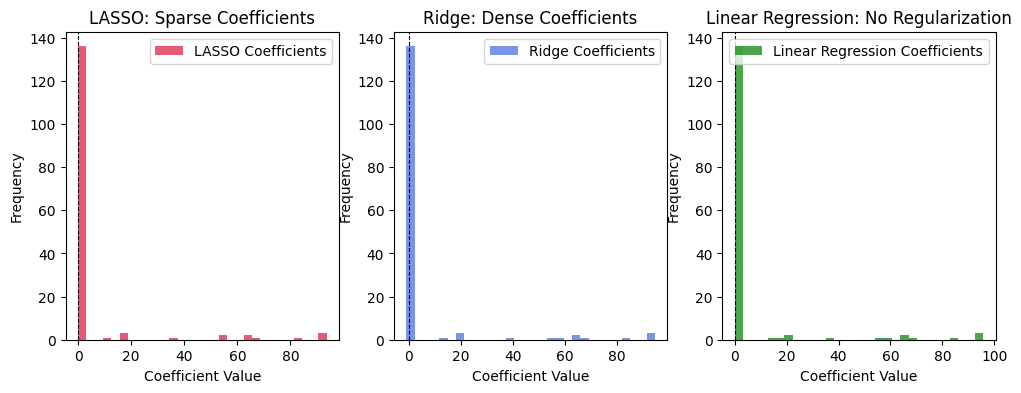

In [12]:
# Compare the coefficients
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(lasso.coef_, bins=30, color='crimson', alpha=0.7, label='LASSO Coefficients')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('LASSO: Sparse Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(ridge.coef_, bins=30, color='royalblue', alpha=0.7, label='Ridge Coefficients')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Ridge: Dense Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(linear.coef_, bins=30, color='green', alpha=0.7, label='Linear Regression Coefficients')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.title('Linear Regression: No Regularization')
plt.xlabel('Coefficient Value')
plt.ylabel('Frequency')
plt.legend()



# Inspect the number of non-zero coefficients
print(f"LASSO non-zero coefficients: {np.sum(lasso.coef_ != 0)}")
print(f"Ridge non-zero coefficients: {np.sum(ridge.coef_ != 0)}")
print(f"Linear Regression non-zero coefficients: {np.sum(linear.coef_ != 0)}")

print(f"LASSO Test MSE: {lasso_mse:.4f}")
print(f"Ridge Test MSE: {ridge_mse:.4f}")
print(f"Linear Regression Test MSE: {linear_mse:.4f}")

**Analisi degli Istogrammi dei Coefficienti**

- **LASSO (Rosso)**:
  - Il grafico mostra una barra altissima esattamente sul valore X=0. Le altre barre (poche) sono a destra.
  - Interpretazione: Questo grafico è l'unico che mostra la sparsità. La barra a 0 rappresenta i 136 coefficienti che LASSO ha forzatamente azzerato. Anche se le features inutili erano correlate a quelle utili, la penalità L1 lo ha costretto a scegliere solo 14 "campioni" e a eliminare tutto il resto.
  
- **Ridge (Blu)**:
  - Il grafico mostra una barra altissima vicino a 0 (ma non esattamente a 0). È una nuvola di punti strettissima.
  - Interpretazione: Questo grafico mostra la compressione (shrinkage). A causa della multicollinearità, Ridge non ha scelto; ha "spalmato" l'importanza su tutte le 150 features. Però, la penalità L2 (regul=2.0) ha "schiacciato" tutti questi 150 coefficienti, rimpicciolendoli fino a farli diventare una palla stretta vicino allo zero. Nessuno è esattamente zero, ma sono tutti piccolissimi.
  
- **Linear Regression (Verde)**:
  - Il grafico assomiglia molto a Ridge. È una barra alta vicino a 0.
  - Interpretazione: Questo è il punto chiave. Anche la Regressione Lineare (OLS) soffre di multicollinearità. Come Ridge, ha "spalmato" l'importanza su quasi tutte le features (148). Non avendo una penalità che li "schiaccia", perché sono comunque tutti piccoli? Perché con noise=0 e dati correlati, ci sono infinite soluzioni perfette. Il modello OLS ne ha trovata una in cui l'importanza è distribuita su 148 features, ma con un peso piccolo per ciascuna.

Text(0, 0.5, 'Mean Squared Error')

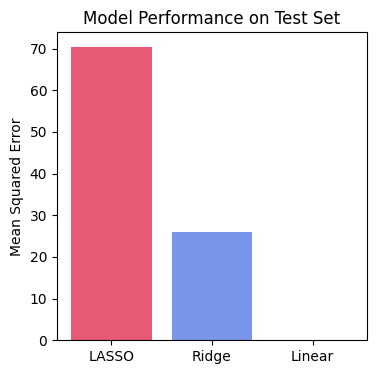

In [13]:
# Plot model performance
plt.figure(figsize=(4, 4))
plt.bar(['LASSO', 'Ridge', 'Linear'], [lasso_mse, ridge_mse, linear_mse], color=['crimson', 'royalblue', 'green'], alpha=0.7)
plt.title('Model Performance on Test Set')
plt.ylabel('Mean Squared Error')

Vogliamo vedere quale modello sbaglia meno.
**La regressione lineare standard ha prodotto una performance perfetta.**

Il motivo è legato al noise = 0.

Problema: Hai 150 features per spiegare y. 15 sono utili, 135 sono inutili ma correlate.

- **Regressione Lineare (OLS)**: Il suo compito è trovare una combinazione qualsiasi delle 150 features che dia come risultato y. Dato che non c'è rumore (noise=0), questo è un puro problema matematico. OLS è perfettamente in grado di trovare una combinazione complicata di 148 features che (sommate insieme) danno esattamente il valore y. Ha trovato una soluzione perfetta (MSE=0) sul training set e, siccome il test set segue la stessa identica "equazione" perfetta, funziona perfettamente (MSE=0) anche lì.

- **LASSO** e **Ridge**: Hanno fallito (MSE > 0) perché gli abbiamo imposto un vincolo (regul=2.0). Gli abbiamo detto: "Trova la soluzione perfetta, MA non puoi usare coefficienti grandi (Ridge) / devi usare pochi coefficienti (LASSO)". Questo vincolo (o bias) ha impedito loro di trovare la soluzione perfetta che OLS, senza vincoli, è riuscito a trovare.

In sintesi, questo esperimento dimostra magnificamente che in presenza di multicollinearità, OLS e Ridge tendono a "spalmare" l'importanza su molte features (modelli densi).

LASSO, al contrario, è costretto a scegliere (modello sparso).

La regolarizzazione (introdurre un bias) è utile solo per combattere la varianza (rumore). Se i dati sono perfetti e senza rumore (noise=0), la regolarizzazione peggiora solo il risultato.

Ora vogoliamo vedere un confronto tra i valori veri (asse x) e i valori predetti (asse y). Se il modello fosse perfetto allora tutti i dati giacerebbero sulla retta y=x.

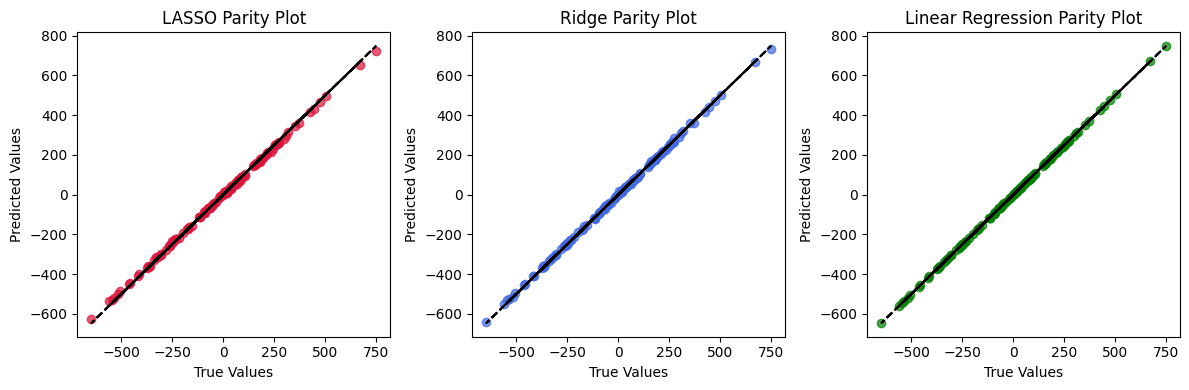

In [14]:
# Parity plots
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(y_test, lasso_pred, color='crimson', alpha=0.7)
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.title('LASSO Parity Plot')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 3, 2)
plt.scatter(y_test, ridge_pred, color='royalblue', alpha=0.7)
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.title('Ridge Parity Plot')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.subplot(1, 3, 3)
plt.scatter(y_test, linear_pred, color='green', alpha=0.7)
plt.plot(y_test, y_test, color='black', linestyle='--')
plt.title('Linear Regression Parity Plot')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()